In [2]:
using SparseArrays
# run(`wget https://snap.stanford.edu/data/loc-gowalla_edges.txt.gz`)

# #unzip the data
# run(`gunzip -k loc-gowalla_edges.txt.gz`)

#if package doesn't exist yet: `using Pkg; Pkg.clone("https://github.com/dgleich/NumbersFromText.jl")`
using NumbersFromText 
M = readmatrix(Int,"loc-gowalla_edges.txt")
M .+= 1
A = sparse(M[:,1],M[:,2],1,maximum(M),maximum(M)) 
A = max.(A,A') # adjacency matrix of the graph
;

In [5]:
include("all_code/code_needed.jl")
mytriangles = triangles(A)
z = collect(mytriangles)
ei,ej,ek = unzip_triangles(z)
size(z)


(2273138,)

In [9]:
tao = 0.8
Atrain,Atest = split_train_test(A,tao);
ei,ej,ev = findnz(triu(Atrain))
@show length(ei)
n = size(A,1)
myalpha = 0.8
AUC1 = []
AUC2 = []
AUC3 = []
for i = 1:100#length(ei)
    @show i

    v1 = ei[i]
    v2 = ej[i]
    xd,xs1,xs2 = double_seed(Atrain,v1,v2,myalpha)
    
    
    tris = unzip_triangles(collect(triangles(A,v1)))
    # tris2 = unzip_triangles(collect(triangles(A,v2)))
    # tris[1] is all = v1
    ek1 = tris[3][findall(tris[2].==v2)]
    ek2 = tris[2][findall(tris[3].==v2)]
    xref = spzeros(n)
    if !isempty(ek1)
        xref[ek1] .= 1
    end
    if !isempty(ek2)
        xref[ek2] .= 1
    end
    
    tpr,fpr,auc1 = calc_AUC_new(xref,xd); push!(AUC1,auc1);
    tpr,fpr,auc2 = calc_AUC_new(xref,xs1); push!(AUC2,auc2);
    tpr,fpr,auc3 = calc_AUC_new(xref,xs2); push!(AUC3,auc3);
    
end

length(ei) = 760261
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
i = 100


┌ Warning: seriestype boxplot has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /homes/hnassar/.julia/packages/Plots/UQI78/src/args.jl:1054
┌ Warning: seriestype boxplot has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /homes/hnassar/.julia/packages/Plots/UQI78/src/args.jl:1054


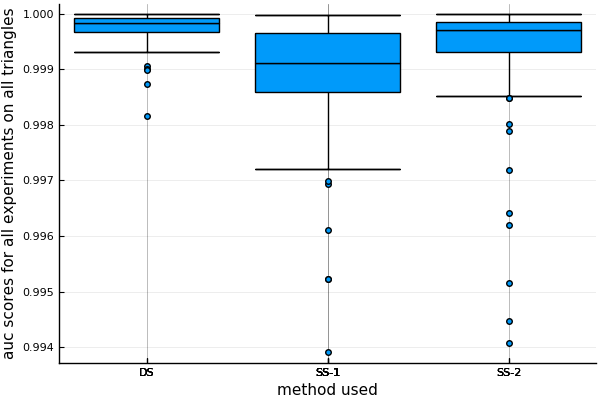

In [23]:
pyplot()
aucvals = hcat(AUC1,AUC2,AUC3)
aucvals = aucvals'[:]
boxplot(["DS","SS-1","SS-2"],aucvals,leg=false)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")

In [24]:
nnz(A)/prod(size(A))

4.917855913452399e-5

In [31]:
# run(`wget https://snap.stanford.edu/data/p2p-Gnutella04.txt.gz`)

#unzip the data
# run(`gunzip -k p2p-Gnutella04.txt.gz`)

# #if package doesn't exist yet: `using Pkg; Pkg.clone("https://github.com/dgleich/NumbersFromText.jl")`
using NumbersFromText 
M = readmatrix(Int,"loc-gowalla_edges.txt")
M .+= 1
B = sparse(M[:,1],M[:,2],1,maximum(M),maximum(M)) 
B = max.(B,B') # adjacency matrix of the graph
;

In [33]:
tao = 0.8
Atrain,Atest = split_train_test(B,tao);
ei,ej,ev = findnz(triu(Atrain))
@show length(ei)
n = size(A,1)
myalpha = 0.8
AUC1 = []
AUC2 = []
AUC3 = []
for i = 1:length(ei)
    @show i

    v1 = ei[i]
    v2 = ej[i]
    xd,xs1,xs2 = double_seed(Atrain,v1,v2,myalpha)
    
    
    tris = unzip_triangles(collect(triangles(A,v1)))
    # tris2 = unzip_triangles(collect(triangles(A,v2)))
    # tris[1] is all = v1
    ek1 = tris[3][findall(tris[2].==v2)]
    ek2 = tris[2][findall(tris[3].==v2)]
    xref = spzeros(n)
    if !isempty(ek1)
        xref[ek1] .= 1
    end
    if !isempty(ek2)
        xref[ek2] .= 1
    end
    
    tpr,fpr,auc1 = calc_AUC_new(xref,xd); push!(AUC1,auc1);
    tpr,fpr,auc2 = calc_AUC_new(xref,xs1); push!(AUC2,auc2);
    tpr,fpr,auc3 = calc_AUC_new(xref,xs2); push!(AUC3,auc3);
    
end

length(ei) = 760261
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51


InterruptException: InterruptException:

┌ Warning: seriestype boxplot has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /homes/hnassar/.julia/packages/Plots/UQI78/src/args.jl:1054
┌ Warning: seriestype boxplot has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /homes/hnassar/.julia/packages/Plots/UQI78/src/args.jl:1054


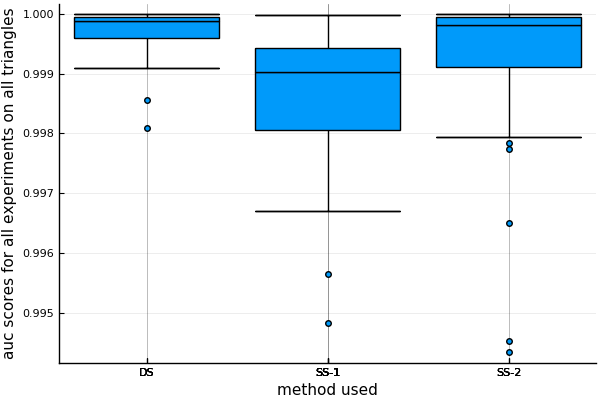

In [34]:
pyplot()
aucvals = hcat(AUC1,AUC2,AUC3)
aucvals = aucvals'[:]
boxplot(["DS","SS-1","SS-2"],aucvals,leg=false)
xlabel!("method used")
ylabel!("auc scores for all experiments on all triangles")